In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor


In [ ]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor()
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 8893510.35it/s] 


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 353305.37it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 2358730.23it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8527541.97it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
from torch.utils.data import DataLoader

loaders = {
    'train' : DataLoader(train_data,
                         batch_size=100,
                         shuffle=True,
                         num_workers=1),

    'test'  : DataLoader(test_data,
                         batch_size=100,
                         shuffle=True,
                         num_workers=1),
}

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):

  def __init__(self):
   super(CNN, self).__init__()

   self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
   self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
   self.conv2_drop = nn.Dropout2d()
   self.fc1 = nn.Linear(320, 50)
   self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    x = F.relu(F.max_pool2d(self.conv1(x), 2))
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
    x = x.view(-1, 320)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, training=self.training)
    x = self.fc2(x)

    return F.softmax(x)

In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(loaders['train']):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 20 == 0:
      print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.0f}%)]\tLoss: {loss.item():.6f}')

def test():
  model.eval()

  test_loss = 0
  correct = 0

  with torch.no_grad():
    for data, target in loaders['test']:
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += loss_fn(output, target).item()
      pred = output.data.argmax(dim=1, keepdim=True)
      correct += pred.eq(target.view_as(pred)).sum().item()

  test_loss /= len(loaders['test'].dataset)
  print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(loaders["test"].dataset)} ({100. * correct / len(loaders["test"].dataset):.0f}%)')

In [ ]:
for epoch in range(1, 11):
  train(epoch)
  test()

<ipython-input-4-87058fbab322>:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.302316
Train Epoch: 1 [2000/60000 (3%)]	Loss: 2.296815
Train Epoch: 1 [4000/60000 (7%)]	Loss: 2.150464
Train Epoch: 1 [6000/60000 (10%)]	Loss: 2.034416
Train Epoch: 1 [8000/60000 (13%)]	Loss: 1.873980
Train Epoch: 1 [10000/60000 (17%)]	Loss: 1.788193
Train Epoch: 1 [12000/60000 (20%)]	Loss: 1.765693
Train Epoch: 1 [14000/60000 (23%)]	Loss: 1.833062
Train Epoch: 1 [16000/60000 (27%)]	Loss: 1.777220
Train Epoch: 1 [18000/60000 (30%)]	Loss: 1.730951
Train Epoch: 1 [20000/60000 (33%)]	Loss: 1.732608
Train Epoch: 1 [22000/60000 (37%)]	Loss: 1.786362
Train Epoch: 1 [24000/60000 (40%)]	Loss: 1.673055
Train Epoch: 1 [26000/60000 (43%)]	Loss: 1.657415
Train Epoch: 1 [28000/60000 (47%)]	Loss: 1.645012
Train Epoch: 1 [30000/60000 (50%)]	Loss: 1.631675
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.685088
Train Epoch: 1 [34000/60000 (57%)]	Loss: 1.744034
Train Epoch: 1 [36000/60000 (60%)]	Loss: 1.637877
Train Epoch: 1 [38000/60000 (63%)]	Loss: 1.577041
Train Epoch

Prediction: tensor([[7]])


<ipython-input-4-87058fbab322>:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


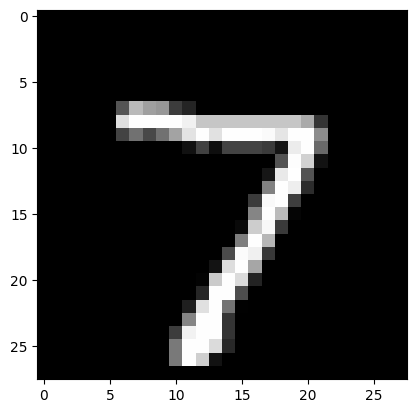

In [ ]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[0]

data = data.unsqueeze(0).to(device)

output = model(data)

prediction = output.argmax(dim=1, keepdim=True)

print(f'Prediction: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()